In [48]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
raw_data = pd.read_csv('C:\SkillFactory\SF_DataScience\Current_tasks\data\winequality-red.csv', sep=';')

In [50]:
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [51]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [52]:
# Вывод общих статистических параметров
raw_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


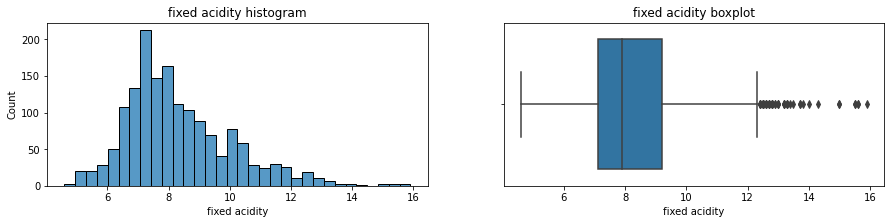

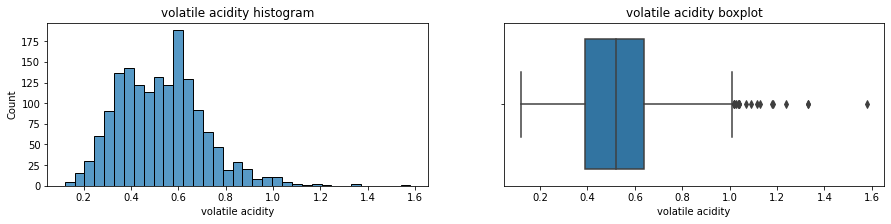

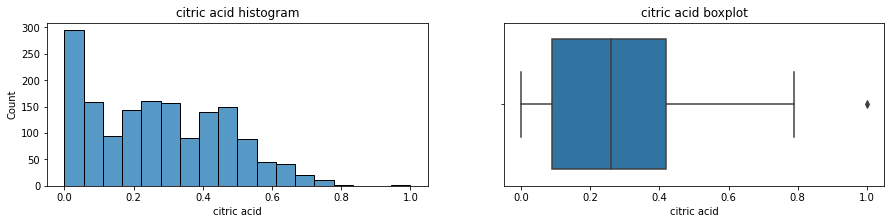

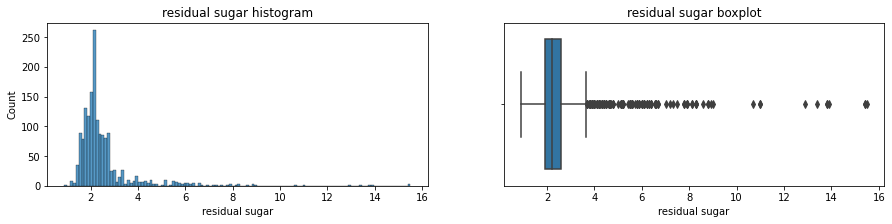

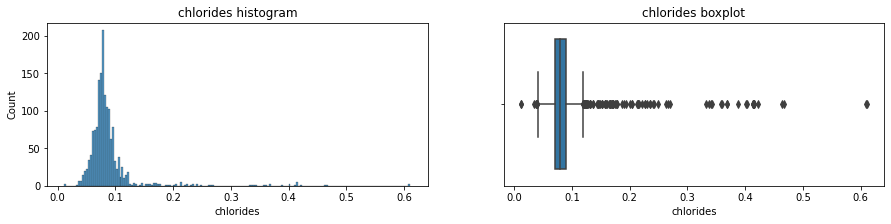

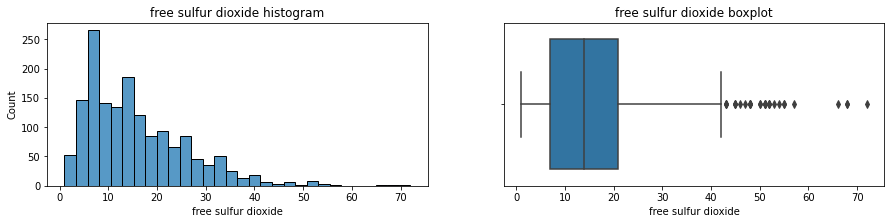

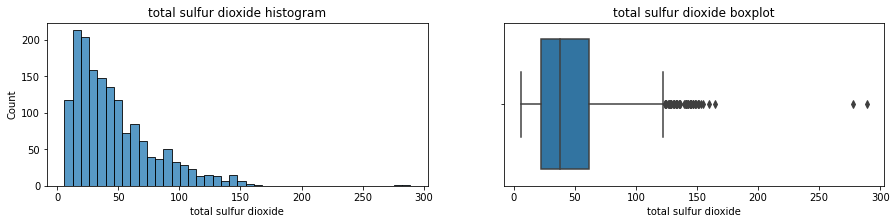

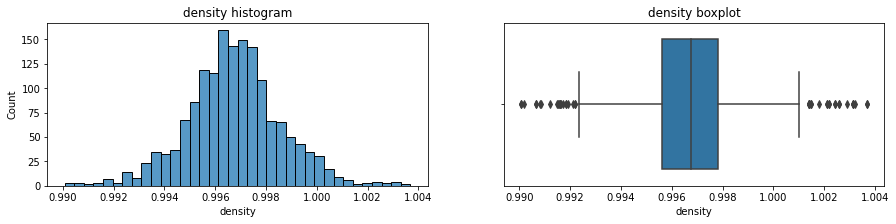

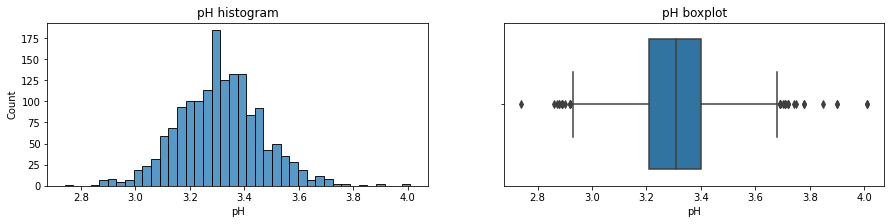

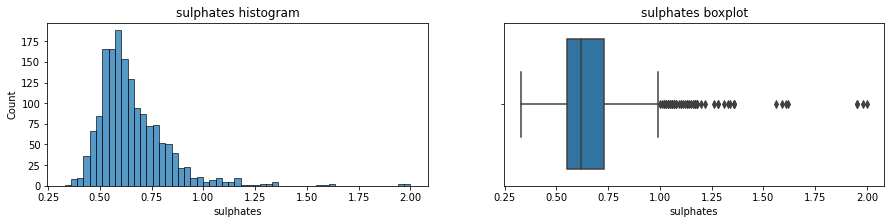

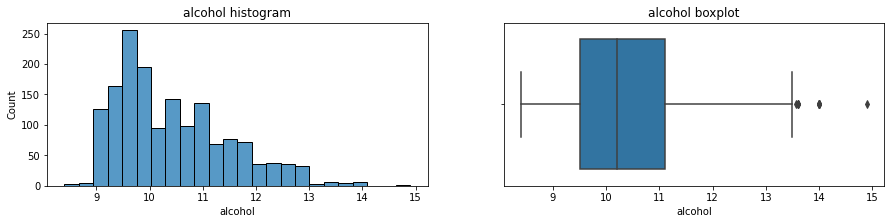

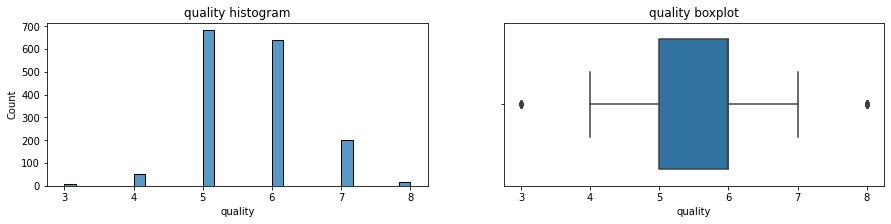

In [53]:
# Визуализация распределения целевой переменной и признаков
for col in raw_data.columns:
    fig,axes = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(data=raw_data, x=col, ax=axes[0])
    sns.boxplot(data=raw_data, x=col, ax=axes[1])
    axes[0].set_title(f'{col} histogram')
    axes[1].set_title(f'{col} boxplot');

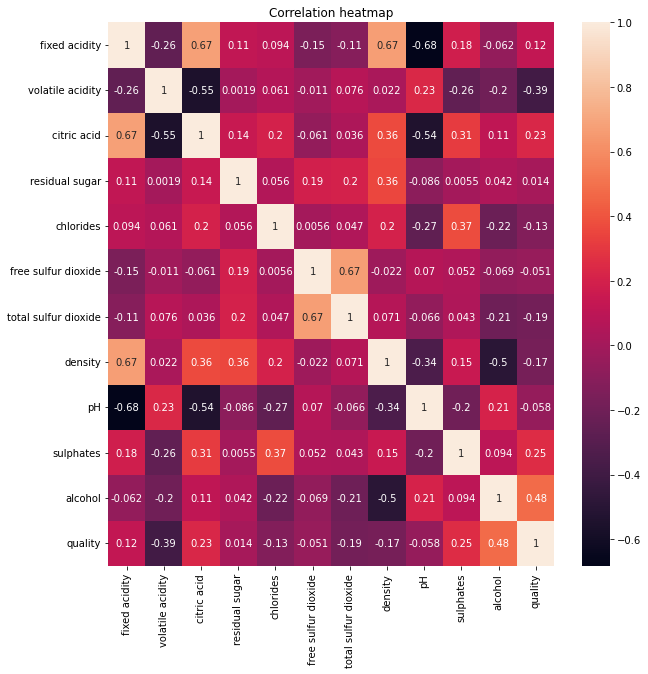

In [54]:
# Корреляционная матрица
plt.figure(figsize=(10, 10))
sns.heatmap(raw_data.corr(), annot=True)
plt.title('Correlation heatmap');

In [55]:
# Pre-processing
processed_data = raw_data.copy()
processed_data['quality'] = processed_data['quality'].apply(lambda x: 'bad_wine' if x < 6.5 else 'good wine')
processed_data['quality'] = processed_data['quality'].apply(lambda x: 0 if x == 'bad_wine' else 1)
processed_data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [56]:
# Масштабирование данных
scale = StandardScaler()
scaled_data = processed_data.copy().drop('quality', axis=1)
scaled_data= scale.fit_transform(scaled_data)

X_train_scaled = scaled_data

y_train = processed_data.quality

In [57]:
search_space = {
                'svc__C' : [0.1, 0.5, 1],
                'svc__gamma' : ['scale', 'auto'],
                'svc__kernel' : ['linear', 'poly', 'rbf', 'sigmoid']
                }

model = Pipeline([('svc', SVC(probability=True))])

In [58]:
rand_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=search_space,
    n_jobs=-1,
    cv=5,
    n_iter=70,
    scoring='accuracy'
)

In [59]:
rand_model = rand_search.fit(X_train_scaled, y_train)
print(rand_model.best_score_)
print(rand_model.best_params_)

c:\Users\Пользователь\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 24 is smaller than n_iter=70. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.8705446708463951
{'svc__kernel': 'poly', 'svc__gamma': 'auto', 'svc__C': 0.5}


In [61]:
# Модель SVC с rbf ядром (для собственного интересна)
svc = SVC(probability = True)
cv = cross_val_score(svc, X_train_scaled, y_train,cv=5)
print(cv.mean())

0.8692927115987461
